<a href="https://colab.research.google.com/github/FerdousJUST/VGG19-model-with-confusion-matrix-and-classification-report/blob/main/VGG19_image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training'
valid_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'
     

In [3]:

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [4]:

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/*')

In [6]:

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

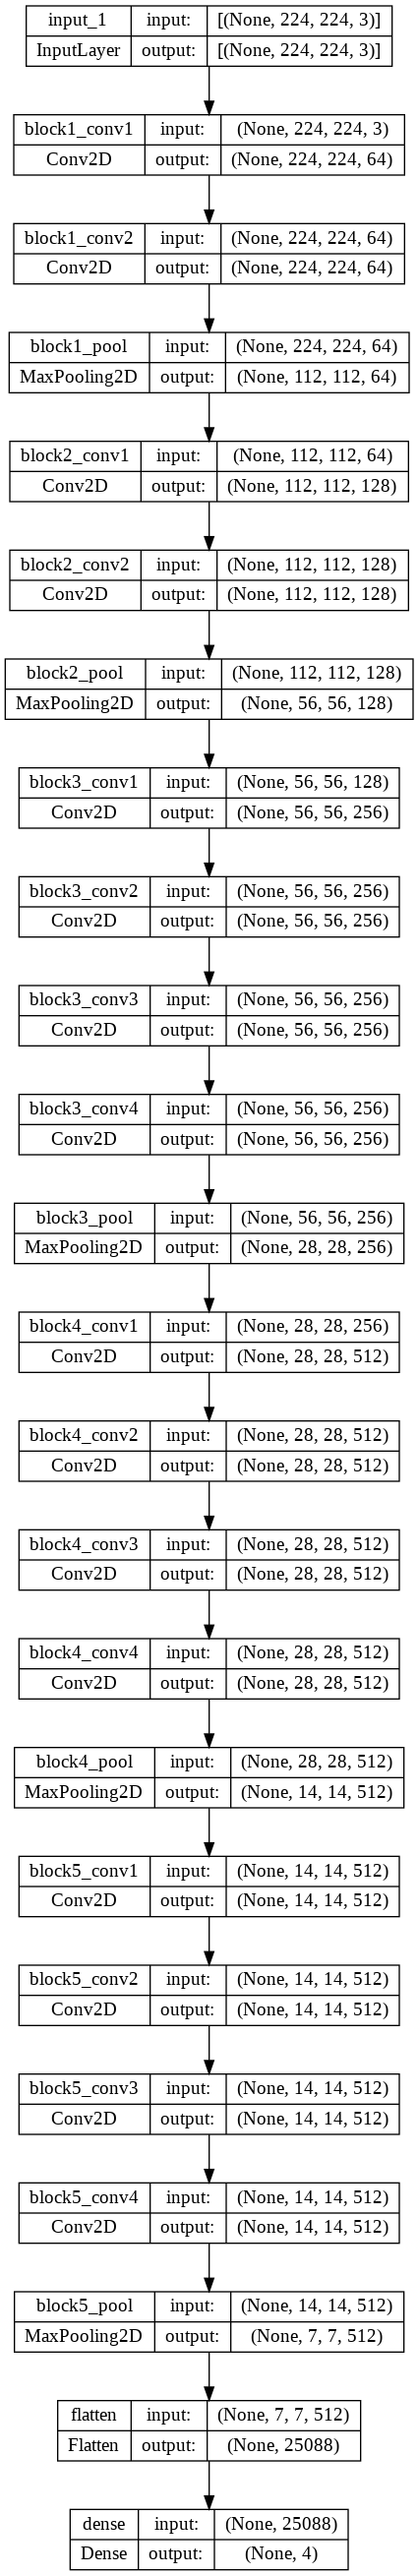

In [9]:
plot_model(model = model,show_shapes = True)

In [10]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [12]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part five/vgg19_new_model.h5')

In [13]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-13-39a22121036e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
150/150 [==============================] - 4006s 27s/step - loss: 0.4142 - accuracy: 0.8644 - val_loss: 0.1671 - val_accuracy: 0.9533
Epoch 2/5
150/150 [==============================] - 3941s 26s/step - loss: 0.0956 - accuracy: 0.9796 - val_loss: 0.0708 - val_accuracy: 0.9842
Epoch 3/5
150/150 [==============================] - 3985s 27s/step - loss: 0.0629 - accuracy: 0.9831 - val_loss: 0.0486 - val_accuracy: 0.9883
Epoch 4/5
150/150 [==============================] - 3969s 26s/step - loss: 0.0376 - accuracy: 0.9940 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 5/5
150/150 [==============================] - 4008s 27s/step - loss: 0.0341 - accuracy: 0.9925 - val_loss: 0.0789 - val_accuracy: 0.9700


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

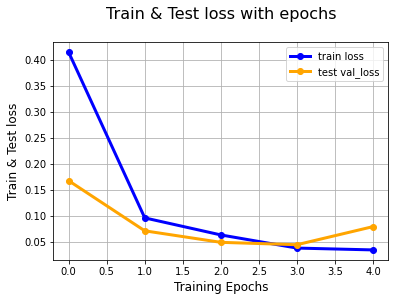

In [14]:
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train loss', 'test val_loss'], loc='upper right')
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

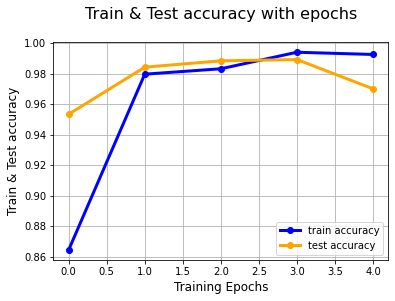

In [16]:
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [17]:
acc = model.evaluate(valid_path,steps = len(valid_path),verbose = 2)
print('%.2f'%(acc[1]*100))

IndexError: ignored

In [18]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 017.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 977ms/step
[[1. 0. 0. 0.]]
 Barbel Fish 


In [19]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation/Barbel_Fish/Barbel_Fish 008.png', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 734ms/step
[[1. 0. 0. 0.]]
 Barbel Fish 


In [20]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation/Hilsha_Fish/Hilsha_Fish 032.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 741ms/step
[[0. 1. 0. 0.]]
Hilsha Fish 


In [21]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation/Spotted_Snakehead_Fish/Spotted_Fish 034.jpg', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 736ms/step
[[0. 0. 1. 0.]]
Spotted Snakehead Fish 


In [22]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation/Tilapia_Fish/Tilapia_Fish 019.png', 
                      target_size = (224,224))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

if   rslt[0][0] == 1:
        ans = " Barbel Fish "
elif rslt[0][1] == 1:
        ans = "Hilsha Fish "
elif rslt[0][2] == 1:
        ans = "Spotted Snakehead Fish "
elif rslt[0][3] == 1:
        ans = " Tilapia Fish"
print(ans)

1/1 [==============================] - 1s 752ms/step
[[0. 0. 0. 1.]]
 Tilapia Fish


In [25]:


import os
import cv2


def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
       sub_path = path +"/"+ folder

  for img in os.listdir(sub_path):
      image_path = sub_path + "/"+ img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr,size)
      data.append(img_arr)

  return data

In [26]:
size = (224,224)

In [27]:
%%time

train = imagearray(train_path,size)
test = imagearray(valid_path,size)

CPU times: user 8.49 s, sys: 15.8 s, total: 24.3 s
Wall time: 30.7 s


In [48]:
test

[array([[[202, 200, 199],
         [202, 200, 199],
         [201, 199, 198],
         ...,
         [187, 186, 184],
         [183, 182, 178],
         [182, 182, 178]],
 
        [[202, 200, 199],
         [202, 200, 199],
         [201, 199, 198],
         ...,
         [188, 185, 184],
         [183, 182, 178],
         [183, 182, 178]],
 
        [[202, 200, 199],
         [202, 200, 199],
         [201, 199, 198],
         ...,
         [187, 186, 185],
         [183, 182, 178],
         [183, 182, 178]],
 
        ...,
 
        [[192, 190, 189],
         [192, 190, 189],
         [194, 192, 191],
         ...,
         [186, 187, 185],
         [187, 188, 186],
         [188, 189, 187]],
 
        [[191, 189, 188],
         [192, 190, 189],
         [195, 193, 192],
         ...,
         [188, 189, 187],
         [189, 190, 188],
         [189, 190, 188]],
 
        [[192, 190, 189],
         [192, 190, 189],
         [194, 192, 191],
         ...,
         [188, 189, 187],
  

In [28]:
train

[array([[[162, 166, 164],
         [163, 166, 164],
         [164, 166, 164],
         ...,
         [165, 170, 168],
         [165, 170, 168],
         [165, 170, 168]],
 
        [[165, 168, 166],
         [165, 168, 166],
         [165, 168, 166],
         ...,
         [168, 173, 171],
         [167, 172, 170],
         [167, 172, 170]],
 
        [[165, 168, 166],
         [166, 169, 167],
         [166, 169, 167],
         ...,
         [169, 174, 172],
         [170, 175, 173],
         [170, 175, 173]],
 
        ...,
 
        [[163, 160, 162],
         [162, 159, 161],
         [161, 158, 160],
         ...,
         [179, 182, 180],
         [178, 181, 179],
         [178, 181, 179]],
 
        [[164, 161, 163],
         [161, 158, 160],
         [160, 157, 159],
         ...,
         [177, 180, 178],
         [178, 182, 177],
         [178, 182, 177]],
 
        [[162, 159, 161],
         [161, 158, 160],
         [161, 158, 160],
         ...,
         [177, 180, 178],
  

In [69]:
x_train = np.array(train)
#x_test = np.array(test)
x_test = np.array(train)

#x_train = np.array([[train]])
#x_test = np.array(train)

In [54]:
x_train = x_train/255
x_test = x_test/255

In [55]:
x_test

array([[[[0.63529412, 0.65098039, 0.64313725],
         [0.63921569, 0.65098039, 0.64313725],
         [0.64313725, 0.65098039, 0.64313725],
         ...,
         [0.64705882, 0.66666667, 0.65882353],
         [0.64705882, 0.66666667, 0.65882353],
         [0.64705882, 0.66666667, 0.65882353]],

        [[0.64705882, 0.65882353, 0.65098039],
         [0.64705882, 0.65882353, 0.65098039],
         [0.64705882, 0.65882353, 0.65098039],
         ...,
         [0.65882353, 0.67843137, 0.67058824],
         [0.65490196, 0.6745098 , 0.66666667],
         [0.65490196, 0.6745098 , 0.66666667]],

        [[0.64705882, 0.65882353, 0.65098039],
         [0.65098039, 0.6627451 , 0.65490196],
         [0.65098039, 0.6627451 , 0.65490196],
         ...,
         [0.6627451 , 0.68235294, 0.6745098 ],
         [0.66666667, 0.68627451, 0.67843137],
         [0.66666667, 0.68627451, 0.67843137]],

        ...,

        [[0.63921569, 0.62745098, 0.63529412],
         [0.63529412, 0.62352941, 0.63137255]

In [56]:
x_train

array([[[[0.63529412, 0.65098039, 0.64313725],
         [0.63921569, 0.65098039, 0.64313725],
         [0.64313725, 0.65098039, 0.64313725],
         ...,
         [0.64705882, 0.66666667, 0.65882353],
         [0.64705882, 0.66666667, 0.65882353],
         [0.64705882, 0.66666667, 0.65882353]],

        [[0.64705882, 0.65882353, 0.65098039],
         [0.64705882, 0.65882353, 0.65098039],
         [0.64705882, 0.65882353, 0.65098039],
         ...,
         [0.65882353, 0.67843137, 0.67058824],
         [0.65490196, 0.6745098 , 0.66666667],
         [0.65490196, 0.6745098 , 0.66666667]],

        [[0.64705882, 0.65882353, 0.65098039],
         [0.65098039, 0.6627451 , 0.65490196],
         [0.65098039, 0.6627451 , 0.65490196],
         ...,
         [0.6627451 , 0.68235294, 0.6745098 ],
         [0.66666667, 0.68627451, 0.67843137],
         [0.66666667, 0.68627451, 0.67843137]],

        ...,

        [[0.63921569, 0.62745098, 0.63529412],
         [0.63529412, 0.62352941, 0.63137255]

In [57]:
def data_class(data_path,size,class_mode):
    datagen  = ImageDataGenerator(rescale=1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [58]:
train_class = data_class(train_path,size,"sparse")
test_class = data_class(valid_path,size,"sparse")

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [59]:
y_train = train_class.classes 
y_test = test_class.classes

In [70]:
train_class.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [71]:
#train_class.classes.transpose()

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [50]:
test_class.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [72]:
train_class.class_indices

{'Barbel_Fish': 0,
 'Hilsha_Fish': 1,
 'Spotted_Snakehead_Fish': 2,
 'Tilapia_Fish': 3}

In [73]:
print("y_train_shape",y_train.shape,
"y_test_shape",y_test.shape)

y_train_shape (4800,) y_test_shape (1200,)


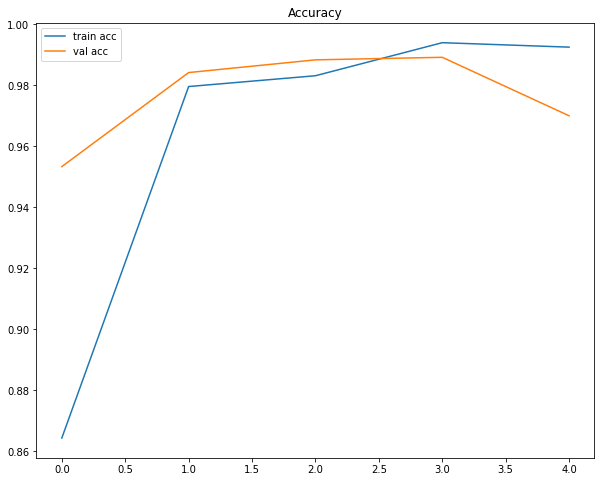

In [63]:
plt.figure(figsize = (10,8))
plt.plot(r.history['accuracy'],label = 'train acc')
plt.plot(r.history['val_accuracy'],label = 'val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

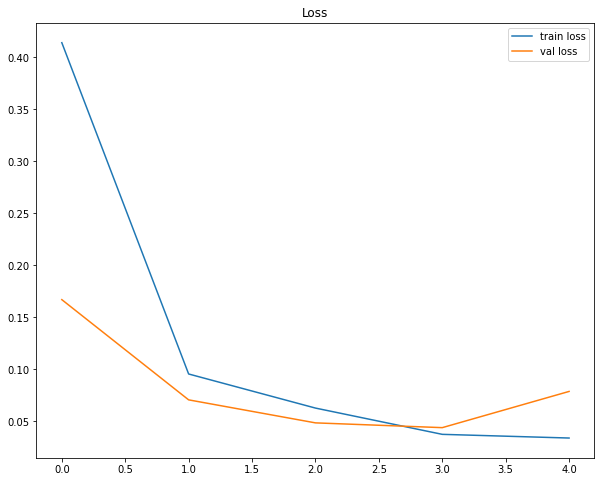

In [64]:
plt.figure(figsize = (10,8))
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.title('Loss')
plt.show()

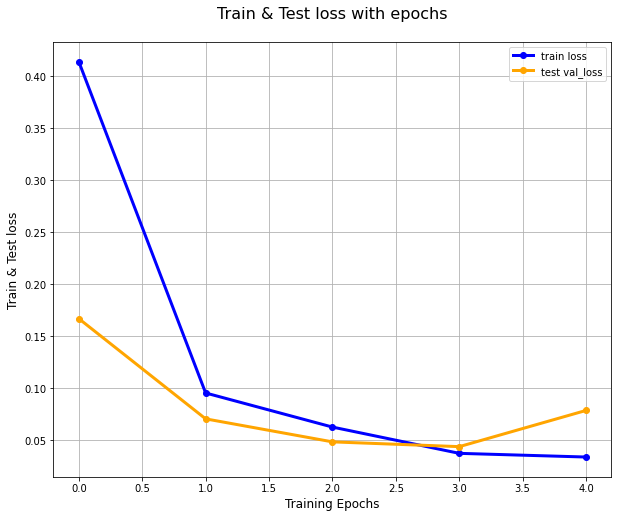

In [65]:
plt.figure(figsize = (10,8))
plt.plot(r.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train loss', 'test val_loss'], loc='upper right')
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

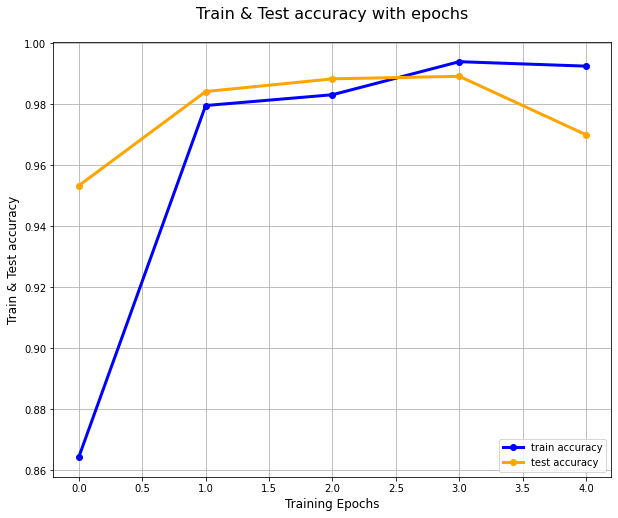

In [66]:
plt.figure(figsize = (10,8))
plt.plot(r.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [67]:
model.evaluate(x_test,y_test,batch_size =32)

ValueError: ignored

In [68]:
y_pred = model.predict(x_test)

38/38 [==============================] - 803s 21s/step


In [90]:
acc = model.evaluate(x_test,steps = len(x_test),verbose = 2)
print('%.2f'%(acc[1]*100))

1200/1200 - 2s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 2s/epoch - 2ms/step
0.00


In [87]:
model.evaluate(y_pred,y_test)

ValueError: ignored

In [74]:
y_pred = np.argmax(y_pred,axis = 1)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      1199
           1       0.00      1.00      0.01         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.25      1200
   macro avg       0.25      0.31      0.10      1200
weighted avg       1.00      0.25      0.40      1200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
print(x_train.shape)
print(y_test.shape)

if x_train.shape[0] != y_test.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(1200, 224, 224, 3)
(1200,)


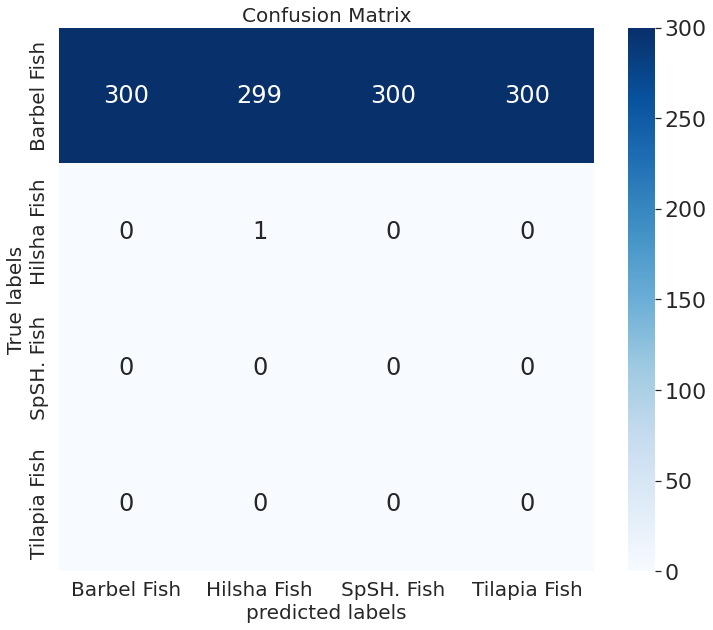

In [83]:

import seaborn as sns

cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(12,10))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

#labels,titleand ticks

ax.set_xlabel('predicted labels',fontsize = 20);ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
#ax.xaxis.set_ticklabels(['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia Fish'],fontsize = 20);
#ax.yaxis.set_ticklabels(['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia Fish'],fontsize = 20);

ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SpSH. Fish','Tilapia Fish'],fontsize = 20);
ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SpSH. Fish','Tilapia Fish'],fontsize = 20);


In [84]:
f1_score(y_test,y_pred,average = 'macro')

0.10172784070886681

In [79]:
recall_score(y_test,y_pred,average = 'weighted')

0.25083333333333335

In [80]:
precision_score(y_test,y_pred,average = 'macro')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.31255212677231026

In [85]:
model.save("/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part five/finalvgg19_model.h5")